# Assignment 3 - Supervised Learning

## *Ravitashaw Bathla*
Netid: rb369

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), which is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

## Learning Objectives:
This assignment will provide structured practice to help enable you to...
1. Understand the primary workflow in machine learning: (1) identifying a hypothesis function set of models, (2) determining a loss/cost/error/objective function to minimize, and (3) minimizing that function through gradient descent
2. Implement batch gradient descent and become familiar with how that technique is used and its dependence on the choice of learning rate
3. Gain practice in implementing machine learning algorithms to understand the math and programming behind them to achieve practical proficiency with the techniques
4. Evaluate supervised learning algorithm performance through ROC curves and using cross validation
5. Work with imagery data and the basics of computer vision approaches to machine learning
6. Develop an understanding the optimal minimum misclassification error classifier (Bayes' classifier)

In [350]:
# MAC USERS TAKE NOTE:
# For clearer plots in Jupyter notebooks on macs, run the following line of code:
# %config InlineBackend.figure_format = 'retina'
#%reset
import warnings
warnings.filterwarnings('ignore')

## 1
### [40 points] From theory to practice: classification through logistic regression

#### Introduction
For this problem you will derive, implement through gradient descent, and test the performance of a logistic regression classifier for a binary classification problem.

In this case, we'll assume our logistic regression problem will be applied to a two dimensional feature space. Our logistic regression model is:

$$f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^{\intercal} \mathbf{x}_i)$$

where the sigmoid function is defined as $\sigma(x) = \dfrac{e^x}{1+e^{x}}= \dfrac{1}{1+e^{-x}}$. Also, since this is a two-dimensional problem, we define $\mathbf{w}^{\intercal} \mathbf{x}_i = w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}$ and here, $\mathbf{x}_i=[x_{i,0}, x_{i,1}, x_{i,2}]^{\intercal}$, and $x_{i,0} \triangleq 1$

As in class, we will interpret the response of the logistic regression classifier to be the likelihood of the data given the model parameters. For one sample, $(y_i, \mathbf{x}_i)$, this is given as:

$$P(Y=y_i|X=\mathbf{x}_i) = f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^{\intercal} \mathbf{x}_i)$$

*Aside: the careful reader will recognize this expression looks different from when we talk about the likelihood of our data given the true class label, typically expressed as $P(x|y)$, or the posterior probability of a class label given our data, typically expressed as $P(y|x)$. In the context of training a logistic regression model, we know the training $\mathbf{x}$ values and $y$ values, so the above probability is primarily a function of the logistic regression parameters, $\mathbf{w}$. It's our goal to use this to choose the parameters to maximize the probability of our data by adjusting our model*

#### Find the cost function that we can use to choose the model parameters, $\mathbf{w}$, that best fit the training data.


**(a) What is the likelihood function for all the $N$ samples in our training dataset that we will wish to maximize?**


The likelihood function that we wish to maixmize on our training data set can be represented as:

$$ L(\mathbf{w}) = \prod\limits_{i=1}^n P(Y=y_{i}|X=x_{i}) $$

where, $P(Y=y_{i}|X=x_{i}) $ for Bernoulli (0,1) distribution can be expressed as below on diffrentiating:

$$P(Y=y_{i}|X=x_{i} = \sigma(\mathbf{w}^T\mathbf{x})^y\cdot [1-\sigma(\mathbf{w}^T\mathbf{x})]^{(1-y)} $$

Therefore, the likelihood function becomes for n observations:

$$ L(\mathbf{w}) = \prod\limits_{i=1}^n \sigma(\mathbf{w}^T\mathbf{x})^y\cdot [1-\sigma(\mathbf{w}^T\mathbf{x})]^{(1-y)} $$



**(b) Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express part (a) as a cost function of the model parameters, $C(\mathbf{w})$, that is the negative of the logarithm of (a).**

The average loss over both positive and negative class can be represented as the negative of logarithm of the loss function ($L(w)$) as $C(w)$, which can be represented as:

$$ C(\mathbf{w}) = - \frac{1}{n} log(\prod\limits_{i=1}^n  \sigma(\mathbf{w}^T \mathbf{x}_i)^{y_i} * [1 - \sigma(\mathbf{w}^T \mathbf{x}_i)]^{1-{y_i}}) $$

This can be further simplified using logarithm properties as :

$$ C(\mathbf{w}) = - \frac{1}{n} \sum_{i=1}^{n}y_ilog\sigma(\mathbf{w}^T\mathbf{x}_i)+(1-y_i)log[1-\sigma(\mathbf{w}^T\mathbf{x}_i)] $$


**(c) Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial derivatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\dfrac{\partial C}{\partial w_0}, \dfrac{\partial C}{\partial w_1}, \dfrac{\partial C}{\partial w_2}\right]$.**

Let, $ \mathbf{p} = \sigma(\mathbf{w}^T\mathbf{x}) $ and $z = \mathbf{w}^T\mathbf{x}$

Therefore, $ C(\mathbf{w}) = \mathbf{p}(\mathbf{z}) $, where $\mathbf{z}$ is a function of $\mathbf{w}$ and $\mathbf{x}$. The derivative of $C(\mathbf{w})$ w.r.t $\mathbf{w}$ can be expressed as below using the chain rule.

$$ \nabla_{\mathbf{w}}C(\mathbf{w_{j}}) = \frac{\partial C}{\partial p} * \frac{\partial p}{\partial z} * \frac{\partial z}{\partial w_{j}} $$

where, 
$$ C(\mathbf{p}) = - \frac{1}{n} \sum\limits_{i=1}^n  {y_i}log(p) + (1-{y_i})log(1 - p) 
\qquad \qquad
p(\mathbf{z}) = \sigma(\mathbf{z}) 
\qquad \qquad
z(\mathbf{w_{j}}) = \mathbf{w_{j}}^T\mathbf{x_{j}}$$

Taking individual partial derivaties of each component, 

$$ \frac{\partial C}{\partial p} = - \frac{1}{n} \left(\frac{y}{p} - \frac{1-y}{1-p}\right) 
\qquad \qquad
\frac{\partial p}{\partial z} = p*(1 - p) 
\qquad \qquad
\frac{\partial z}{\partial w_j} = x_j $$

Therefore, 

$$ \nabla_{\mathbf{w}}C(\mathbf{w}) = - \frac{1}{n} \left(\frac{y}{p} - \frac{1-y}{1-p}\right) * p(1-p) * x_j $$

$$ = - \frac{1}{n} (y -  p)*x_j $$

$$ = - \frac{1}{n} \left[y - \sigma(\mathbf{w}^T \mathbf{x}_i)\right] * x_j \qquad \quad j \in [0,1,2] $$






**(d) Write out the gradient descent update equation, assuming $\eta$ represents the learning rate.**

$$\mathbf{w}_j^{update} = \mathbf{w}_j^{prior} - \eta \cdot \nabla_{\mathbf{w}}C(\mathbf{w})$$

#### Prepare and plot your data

**(e) Load the data and scatter plot the data by class. In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.  Comment on the data: do the data appear separable? Why might logistic regression be a good choice for these data or not?**

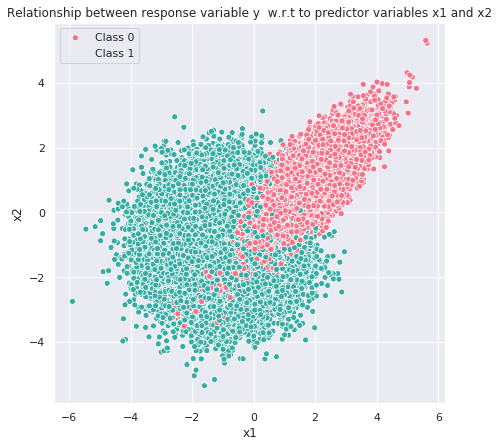

In [312]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#Read CSV File
df = pd.read_csv('./data/A3_Q1_data.csv')

fig = plt.figure(figsize=(7, 7))
sc = sns.scatterplot('x1', 'x2', data=df, hue='y', palette = 'husl')
plt.legend(labels=['Class 0', 'Class 1'])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Relationship between response variable y  w.r.t to predictor variables x1 and x2')
plt.show();

Based upon the scatter plot of x1 and x2 with respect to y, there is no clear decision boundary. The data is not linearly separable. Logisitic Regression might not appear to be a good choice for such distribution in a 2 dimensional space. However, if non-linear features can be included in the logisitic regression during parameter selection, a decision boundary could be established in higher dimension. Therefore, it might be worthwhile to try Logistic Regression for this classification problem. 

**(f) Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?**

The data does not have any missing values and appears to have normal distribution for predictors. The data is balanced as well for both the classes, therefore oversampling or undersampling is not required either. Therefore no specific preprocessing is required. 

In [313]:
#Check shape of the data
print(df.shape)

#Check for missing values
print(df.isnull().sum())

#Check for distribution of predictor and response variable for preprocessing step, if required
print(df.describe())

#Check for class balance
print('\n\nCount of Class 0')
print(len(df[df['y']==0]))
print('\n\nCount of Class 1')
print(len(df[df['y']==1]))

(100000, 3)
x1    0
x2    0
y     0
dtype: int64
                  x1             x2              y
count  100000.000000  100000.000000  100000.000000
mean        0.048529      -0.397106       0.500000
std         1.452409       1.164015       0.500003
min        -5.886436      -5.352265       0.000000
25%        -1.041007      -1.206343       0.000000
50%         0.039551      -0.401099       0.500000
75%         1.143536       0.402899       1.000000
max         5.634476       5.317718       1.000000


Count of Class 0
50000


Count of Class 1
50000


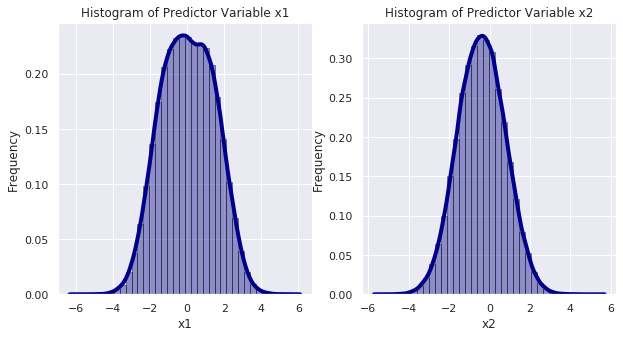

In [314]:
fig, axs = plt.subplots(1,2, figsize=(10, 5), facecolor='w', edgecolor='k')

sns.set()
ax = plt.subplot(1, 2, 1) 
ax = sns.distplot(df['x1'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set(xlabel='x1', ylabel='Frequency', title='Histogram of Predictor Variable x1');

ax = plt.subplot(1, 2, 2) 

ax = sns.distplot(df['x2'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set(xlabel='x2', ylabel='Frequency', title='Histogram of Predictor Variable x2');

plt.show()

#### Implement gradient descent and your logistic regression algorithm

**(g)** Create a function or class to implement your logistic regression. It should take as inputs the model parameters, $\mathbf{w}=\left[w_0,w_1,w_2\right]^{\intercal}$, and output the class confidence probabilities, $P(Y=y_i|X=\mathbf{x}_i)$.

In [315]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def probability(x, weights):
    return sigmoid(np.dot(x, weights))

**(h)Create a function that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels.** 

In [316]:
def cost_function(x, weights, y):
    n = x.shape[0]
    p = probability(x, weights)
    total_cost = -(1 / n) * np.sum( y * np.log(p) + (1 - y) * np.log( 1 - p))
    return total_cost

**(i) Create a function or class to run gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration (or "epoch") of the algorithm.  In doing this we'll need to make some assumptions about and/or experiment with the following:**

*1. The initialization of the algorithm - what should you initialize the model parameters to? For this, randomly initialize the weights to a different values between 0 and 1.*

*2. The learning rate - how slow/fast should the algorithm proceed in the direction opposite the gradient? This you will experiment with.*

*3. Stopping criteria - when should the algorithm be finished searching for the optimum? Set this to be when the cost function changes by no more than $10^{-6}$ between iterations. Since we have a weight vector, you can compute this by seeing if the L2 norm of the weight vector changes by no more than $10^{-6}$ between iterations.*

*Please compute your cost function for a batch as the average cost for the data in your current batch (in this case, a batch is your entire training dataset). In other words, divide your cost by the number of samples in each batch.*

**(j) Design your approach so that at each step in the gradient descent algorithm it will produce updated parameter estimates. For each set of estimates, calculate the cost function for both the training and the test data (no output is necessary here, but this is used in the following question).**




**ANSWER - Combined with (i) and (j)**

In [317]:
class LogisiticRegression():
    
    def __init__(self, learning_rate=0.1, epoch=100, intercept=True, debug=False):
        self.learning_rate = learning_rate
        self.epoch = epoch
        self.intercept = intercept
        self.weights_history = []
        self.debug = debug
        return
            
    def add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def probability(self, X):
        return self.sigmoid(np.dot(X, self.weights))

    def cost_function(self, X, y):
        n = X.shape[0]
        p = self.probability(X)
        total_cost = -(1 / n) * np.sum(y * np.log(p) + (1 - y) * np.log( 1 - p))
        return total_cost
    
    def gradient(self, X, y):
        n = X.shape[0]
        gradient = -(1 / n) * np.dot(X.T, (y - self.probability(X)))
        return gradient
    
    def train(self, X, y):
        
        self.cost_per_epoch_training = []
        if self.intercept:
            X = self.add_intercept(X)
        
        self.weights = np.random.rand(X.shape[1], 1)
                
        for i in range(self.epoch):
            gradient = self.gradient(X, y)
            cost = self.cost_function(X, y)
            
            if self.debug:
                self.cost_per_epoch_training.append(cost)
                self.weights_history.append(self.weights)
                #print(self.weights)
            
            updated_weight = self.weights - (self.learning_rate*gradient)
            
            if np.sqrt(np.sum((updated_weight - self.weights)**2)) < 10**(-6):
                print('Weight update threshold reached. Training Stopped')
                break
            else:
                self.weights = updated_weight
        print('Training process finished')
        return updated_weight
        
    def predict(self, X, threshold=0.5):
        if self.intercept:
            X = self.add_intercept(X) 
        return 1*(self.probability(X) >= threshold)
    
    #This function is used to calculate validation cost based upon weights obtained during training
    # A history oobject with all the weights stored during training is iterated and the cost is calculated
    def validation_cost_function(self, X_test, y_test):
        if self.debug:
            self.cost_per_epoch_testing = []
            n = X_test.shape[0]

            if self.intercept:
                X_test = self.add_intercept(X_test)

            for ep in range(len(self.weights_history)):
                wt = self.weights_history[ep]
                prob = self.sigmoid(np.dot(X_test, wt))
                test_cost = -(1 / n) * np.sum(y_test * np.log(prob) + (1 - y_test) * np.log( 1 - prob))
                self.cost_per_epoch_testing.append(test_cost)
                pass
        
        print('Cost Calculation for Validation Set Finished')

**(k) Divide your data into a training and testing set where the test set accounts for 30 percent of the data and the training set the remaining 70 percent. Show the gradient descent process for different learning rates by plotting the resulting cost as a function of each iteration (or "epoch"). What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why? Use the parameter you choose here for the learning rate for the remainder of this question.**

In [318]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]
y = df.iloc[:,2]
y = y[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=32)

#y_train = np.array([[0],[0],[1],[1]])
#X_train = np.array([[0,2],[1,2],[4,4],[5,4]])

Training process finished
Cost Calculation for Validation Set Finished


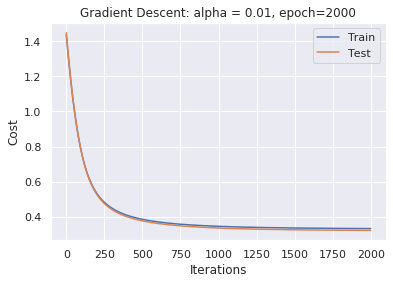

In [319]:
lm = LogisiticRegression(learning_rate=0.01, epoch=2000, intercept=True, debug=True)
lm.train(X_train, y_train)

lm.validation_cost_function(X_test, y_test)

sns.set()
plt.figure()
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.plot(range(len(lm.cost_per_epoch_training)), lm.cost_per_epoch_training)
plt.plot(range(len(lm.cost_per_epoch_testing)), lm.cost_per_epoch_testing)
plt.legend(['Train','Test'])
plt.title('Gradient Descent: alpha = 0.01, epoch=2000')
plt.show()

Training process finished
Cost Calculation for Validation Set Finished


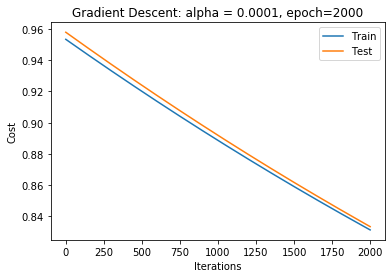

In [160]:
lm = LogisiticRegression(learning_rate=0.0001, epoch=2000, intercept=True, debug=True)
lm.train(X_train, y_train)

lm.validation_cost_function(X_test, y_test)

sns.set()
plt.figure()
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.plot(range(len(lm.cost_per_epoch_training)), lm.cost_per_epoch_training)
plt.plot(range(len(lm.cost_per_epoch_testing)), lm.cost_per_epoch_testing)
plt.legend(['Train','Test'])
plt.title('Gradient Descent: alpha = 0.0001, epoch=2000')
plt.show()

Training process finished
Cost Calculation for Validation Set Finished


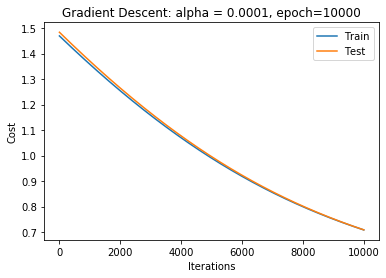

In [161]:
lm = LogisiticRegression(learning_rate=0.0001, epoch=10000, intercept=True, debug=True)
lm.train(X_train, y_train)

lm.validation_cost_function(X_test, y_test)

sns.set()
plt.figure()
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.plot(range(len(lm.cost_per_epoch_training)), lm.cost_per_epoch_training)
plt.plot(range(len(lm.cost_per_epoch_testing)), lm.cost_per_epoch_testing)
plt.legend(['Train','Test'])
plt.title('Gradient Descent: alpha = 0.0001, epoch=10000')
plt.show()

Training process finished
Cost Calculation for Validation Set Finished


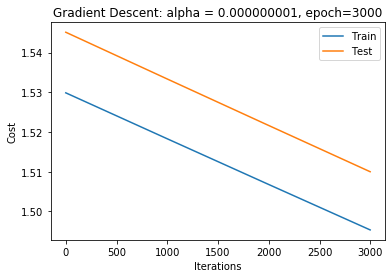

In [148]:
lm = LogisiticRegression(learning_rate=0.00001, epoch=3000, intercept=True, debug=True)
lm.train(X_train, y_train)

lm.validation_cost_function(X_test, y_test)

sns.set()
plt.figure()
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.plot(range(len(lm.cost_per_epoch_training)), lm.cost_per_epoch_training)
plt.plot(range(len(lm.cost_per_epoch_testing)), lm.cost_per_epoch_testing)
plt.legend(['Train','Test'])
plt.title('Gradient Descent: alpha = 0.000000001, epoch=3000')
plt.show()

Weight update threshold reached. Training Stopped
Training process finished
[[-0.19245559]
 [-1.90602044]
 [-0.41914941]]
Cost Calculation for Validation Set Finished


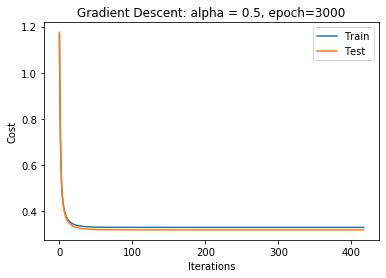

In [145]:
lm = LogisiticRegression(learning_rate=0.5, epoch=3000, intercept=True, debug=True)
lm.train(X_train, y_train)

lm.validation_cost_function(X_test, y_test)

sns.set()
plt.figure()
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.plot(range(len(lm.cost_per_epoch_training)), lm.cost_per_epoch_training)
plt.plot(range(len(lm.cost_per_epoch_testing)), lm.cost_per_epoch_testing)
plt.legend(['Train','Test'])
plt.title('Gradient Descent: alpha = 0.5, epoch=3000')
plt.show()

In [146]:
lm.weights

array([[-0.19245559],
       [-1.90602044],
       [-0.41914941]])

Weight update threshold reached. Training Stopped
Training process finished
[[-0.19244705]
 [-1.90601256]
 [-0.4191434 ]]
Cost Calculation for Validation Set Finished


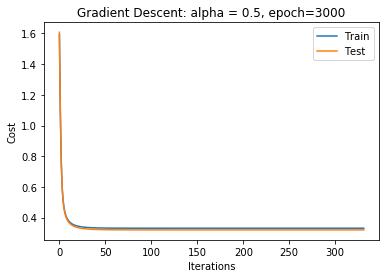

In [107]:
lm = LogisiticRegression(learning_rate=0.5, epoch=3000, intercept=True, debug=True)
lm.train(X_train, y_train)

lm.validation_cost_function(X_test, y_test)

sns.set()
plt.figure()
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.plot(range(len(lm.cost_per_epoch_training)), lm.cost_per_epoch_training)
plt.plot(range(len(lm.cost_per_epoch_testing)), lm.cost_per_epoch_testing)
plt.legend(['Train','Test'])
plt.title('Gradient Descent: alpha = 0.5, epoch=3000')
plt.show()





#### Test your model performance through cross validation

**(l) Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package [StratifiedKFolds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) may be helpful). Produce Receiver Operating Characteristic curves (ROC curves) of your cross validated performance.**

Training process finished
Fold 0 completed.
Training process finished
Fold 1 completed.
Training process finished
Fold 2 completed.
Training process finished
Fold 3 completed.
Training process finished
Fold 4 completed.


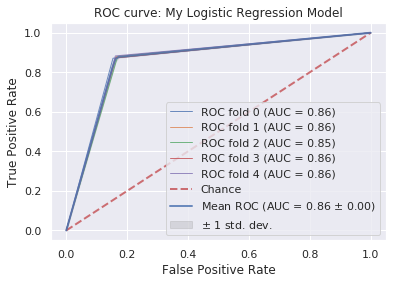

In [321]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import interp

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc

X = np.array(df.iloc[:,:-1])
y = np.array(df.iloc[:,2])
y = y[:, np.newaxis]

cv = StratifiedKFold(n_splits=5)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
final_lm = LogisiticRegression(learning_rate=0.01, epoch=2000, intercept=True, debug=False)
fig = plt.figure(figsize=(14, 14))
for train, test in cv.split(X, y):
    
    final_lm.train(X[train], y[train])
    preds = final_lm.predict(X[test])
    
    fpr, tpr, thresholds = roc_curve(y[test], preds)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    
    sns.set()
    plt.plot(fpr, tpr, lw=1, alpha=0.8, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    
    print('Fold {} completed.'.format(i))
    i += 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
sns.set()
plt.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve: Handmade Logistic Regression Model')
plt.legend(loc="lower right")
plt.show()

In [154]:
aucs

[0.8588, 0.85825, 0.8549, 0.8552500000000001, 0.86125]

**(m)** Why do we use cross validation?

**ANSWER**

Cross validation is used to prevent overfitting. A good model is which generalizes well, that is performs better on unseen data. Using Cross validation, the data is split into several folds. Training and testing of the model occurs on different set of data. Without cross validation, there is a single split. This multiple split results in training and testing of data over a larger set of data and therefore increases the chance of generalization of the mode. Thus, prevents overfitting. 

Cross Validation is also used for hyperparameter selection by search through the grid space for optimal hyperparameters with best scoring metric.

**(n) Make two plots - one of your training data, and one for your test data - with the data scatter-plot and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?**

**ANSWER**

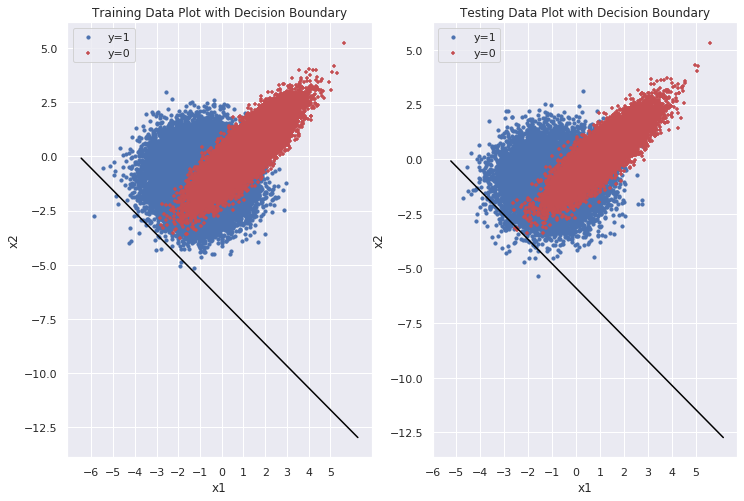

In [351]:
import matplotlib.pyplot as plt

intercept, x1_coeff, x2_coeff = final_lm.weights[0][0], final_lm.weights[1][0], final_lm.weights[2][0]

fig = plt.figure(figsize=(12, 8))
sns.set()
ax1 = fig.add_subplot(121)
ax1.scatter(X_train[y_train==1].x1, X_train[y_train==1].x2, s=10, c='b', marker="o", label='y=1')
ax1.scatter(X_train[y_train==0].x1, X_train[y_train==0].x2, s=10, c='r', marker="+", label='y=0')
plt.legend(loc='upper left');

x_min, x_max = ax1.get_xlim()
plt.xticks(np.arange(-6, 6, step=1))
ax1.plot([x_min, x_max], [intercept, (x_max*x1_coeff)+(x_max*x2_coeff)+intercept], c='black')
plt.title('Training Data Plot with Decision Boundary')
plt.ylabel('x2')
plt.xlabel('x1')

ax2 = fig.add_subplot(122)
ax2.scatter(X_test[y_test==1].x1, X_test[y_test==1].x2, s=10, c='b', marker="o", label='y=1')
ax2.scatter(X_test[y_test==0].x1, X_test[y_test==0].x2, s=10, c='r', marker="+", label='y=0')
plt.legend(loc='upper left')

x_min, x_max = ax2.get_xlim()
ax2.plot([x_min, x_max], [intercept, (x_max*x1_coeff)+(x_max*x2_coeff)+intercept], c='black')
plt.xticks(np.arange(-6, 6, step=1))
plt.title('Testing Data Plot with Decision Boundary')
plt.xlabel('x1')
plt.ylabel('x2')

#plt.subplots_adjust(left=None, bottom=None, right=2.0, top=1.0, wspace=1, hspace=None)

plt.show()

# Comment here!!

**(o) Compare your trained model to random guessing. Show the ROC curve for your model and plot the chance diagonal. What area under the curve (AUC) does your model achieve? How does your model compare in terms of performance?**

**ANSWER**

Training process finished


<Figure size 432x288 with 0 Axes>

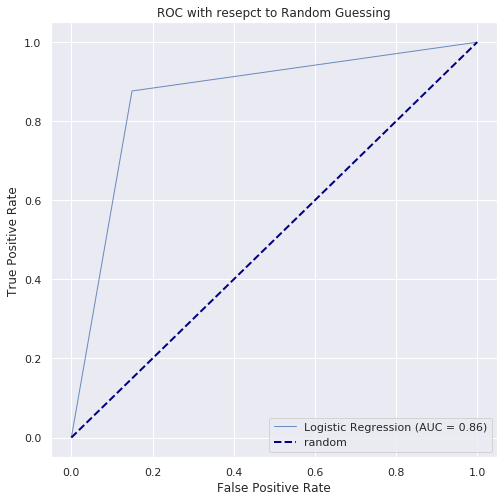

In [332]:
lm_r = lm = LogisiticRegression(learning_rate=0.01, epoch=2000, intercept=True, debug=True)
lm_r.train(X_train,y_train)
preds = lm_r.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, preds)
tprs.append(interp(mean_fpr, fpr, tpr))   
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
fig = plt.figure(figsize=(8, 8))
sns.set()
plt.plot(fpr, tpr, lw=1, alpha=0.8, label='Logistic Regression (AUC = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC with resepct to Random Guessing')
plt.legend(loc="lower right")
plt.show()

The AUC value is 0.86. This is significantly better than random guessing. Random guessing is represented by the dotted line. 

## 2

### [20 points] Digits classification

**(a) Construct your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.**

Your goal is to determine whether or not an example is a 3, therefore your binary classifier will seek to estimate $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format. 

**ANSWER**

In [119]:
from keras.datasets import mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

y_train_binary = (y_train == 3).astype(np.int)
y_test_binary = (y_test == 3).astype(np.int)

**(b) Plot 10 examples of each class (i.e. class $y=0$, which are not 3's and class $y=1$ which are 3's), from the training dataset.**

**ANSWER**

Positive Class Samples


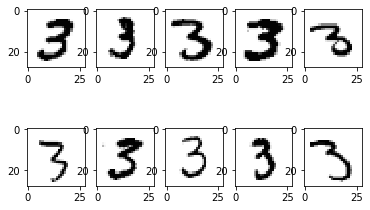

Negative Class Samples


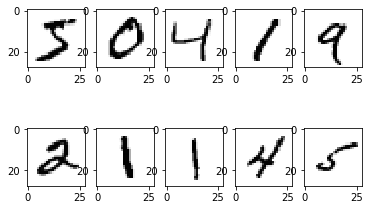

In [120]:
# Plot 10 examples
import matplotlib.pyplot as plt

positive, = np.where(y_train_binary == 1)
first_10_pos = positive[0:10]
negative, = np.where(y_train_binary == 0)
first_10_neg = negative[0:10]

# Print 10 positive images (label = 1)
print('Positive Class Samples')
count = 0

for i in first_10_pos:
    label = y_train_binary[i]
    plt.subplot(2, 5, (count+1))
    plt.imshow(x_train[i], cmap='Greys')
    count += 1
plt.show()

# Print 10 negative images ( label = 0)
print('Negative Class Samples')
count = 0
for i in first_10_neg:
    label = y_train_binary[i]
    plt.subplot(2, 5, (count+1))
    plt.imshow(x_train[i], cmap='Greys')
    count += 1
plt.show()

**(c) How many examples are present in each class? Show a histogram of samples by class. Are the classes balanced? What issues might this cause?**

**ANSWER**

{0: 53869, 1: 6131}


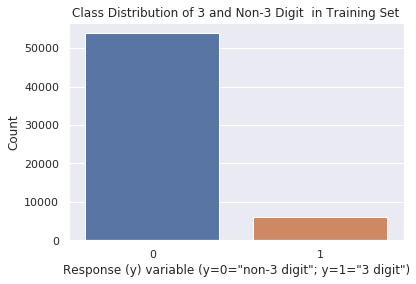

In [349]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = {0: y_train_binary[y_train_binary == 0].shape[0], 1: y_train_binary[y_train_binary == 1].shape[0]}
names = list(data.keys())
values = list(data.values())

palette ={0:"C0",1:"C1"}

sns.set()
sns.barplot(names, values)
plt.xticks([0,1])
plt.title('Class Distribution of 3 and Non-3 Digit  in Training Set')
plt.xlabel('Response (y) variable (y=0="non-3 digit"; y=1="3 digit")')
plt.ylabel('Count')

print(data)

The data set is very imbalanced with Count of Positive Classes = 6131 and Negative classes = 53869. There are almost 90% of negative classes. If the data is highly imbalanced, the classifier output might not be true measure of performance. If the classifer classifies all the Negative classes as negative and zero classes as Positive Classes, it will still have 90 percent accuracy. Also, a model trained on imbalanced data will likely produce the correct class for which the data is large. Therefore, this model can be a good predictor of identifying digits which are NOT 3, but not vice-a-versa. 

**(d) Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.**

**ANSWER**

In [360]:
from scipy import interp

from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from funcsigs import signature


def cv_performance_assessment(X,y,k,classifier):
    
    prediction_scores = np.empty(y.shape[0],dtype='object')
    cv = StratifiedKFold(n_splits=k, shuffle=True)
    count = 0
    for train_index, val_index in cv.split(X, y):
        X_train, X_val = X[train_index], X[val_index]
        y_train = y[train_index]

        nsamples, nx, ny = X_train.shape
        X_train_re = X_train.reshape((nsamples,nx*ny))
        
        # Train the classifier
        classifier = classifier.fit(X_train_re,y_train)
        
        nsamples, nx, ny = X_val.shape
        X_val_re = X_val.reshape((nsamples,nx*ny))
        
        # Test the classifier on the validation data for this fold
        cpred = classifier.predict_proba(X_val_re)
        
        # Save the predictions for this fold
        prediction_scores[val_index] = cpred[:,1]
        
        # Print
        print('Fold' + str(count) + 'completed')
        count += 1
    return prediction_scores

def plot_roc_and_pr(labels, prediction_scores,roc_title,pr_title):
    fpr, tpr, _ = metrics.roc_curve(labels, prediction_scores, pos_label=1)
    auc = metrics.roc_auc_score(labels, prediction_scores)
    precision, recall, _ = precision_recall_curve(labels, prediction_scores)
    average_precision = average_precision_score(labels, prediction_scores)
    legend_string = 'AUC = {:0.3f}'.format(auc)
   
    fig = plt.figure(figsize=(10, 5))
    sns.set()
    
    ax1 = fig.add_subplot(121)
    ax1.plot([0,1],[0,1],'--', color='gray', label='Chance')
    ax1.plot(fpr, tpr, label=legend_string)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid('on')
    plt.axis('square')
    plt.legend()
    plt.title(roc_title)
    plt.tight_layout()
    
    ax2 = fig.add_subplot(122)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(pr_title)
    
    step_kwargs = ({'step': 'post'} if 'step' in signature(plt.fill_between).parameters else {})

    ax2.step(recall, precision, color='b', alpha=0.2, where='post')
    ax2.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.show()

In [123]:
x_train.shape

(60000, 28, 28)

In [354]:
classifier3 = LogisticRegression(solver='saga')
cv_classifier3 = cv_performance_assessment(x_train,y_train_binary,3,classifier3)

Fold0completed
Fold1completed
Fold2completed


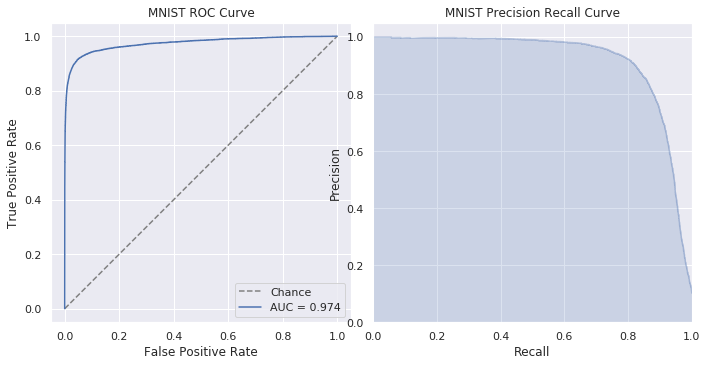

In [361]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from funcsigs import signature

plot_roc_and_pr(y_train_binary, cv_classifier3, 'MNIST ROC Curve', 'MNIST Precision Recall Curve')

Fold0completed
Fold1completed
Fold2completed


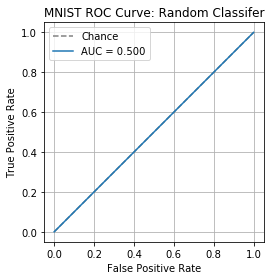

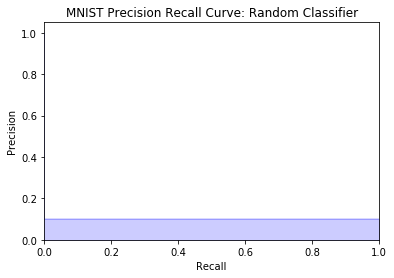

In [75]:
# (1) a classifier that randomly guesses the class
from sklearn.dummy import DummyClassifier

random_clf = DummyClassifier(strategy='uniform', random_state=0)
cv_randomlogreg = cv_performance_assessment(x_train,y_train_binary,3,random_clf)

plot_roc_and_pr(y_train_binary, cv_randomlogreg, 
                'MNIST ROC Curve: Random Classifer', 'MNIST Precision Recall Curve: Random Classifier')

Fold0completed
Fold1completed
Fold2completed


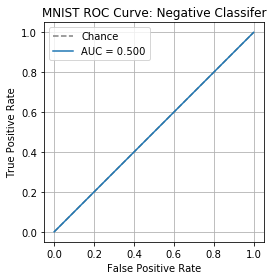

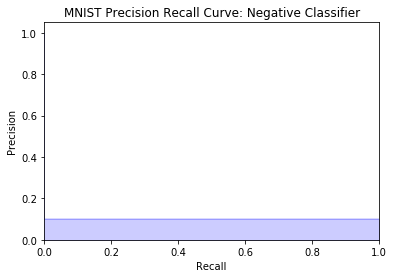

In [79]:
# A classifier that predicts that all examples are NOT 3's.
neg_classifier = DummyClassifier(strategy='constant', random_state=0, constant = 0)
cv_negativelogreg = cv_performance_assessment(x_train,y_train_binary,3,neg_classifier)

plot_roc_and_pr(y_train_binary, cv_negativelogreg, 'MNIST ROC Curve: Negative Classifer', 'MNIST Precision Recall Curve: Negative Classifier')

Based upon the ROC and PR Curve, it is certain that the Logistic Regression performs best with an accuracy of 97 percent. The Random Classifier and Negative Classifier does not perform well. This accuracy is from training dataset, for testing dataset the performance might differ. It could be a possibility that the training set is overfitting. 

The overal predictive power of a model is represented by ROC curve. It can be overly optimistic for imbalanced dataset. The Precision-Recall curve can provide more accurate predictions as it evaluates the ratio of TPR and does not depend on class distribution.

**(f) Using a logistic regression classifier (a linear classifier), apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module (DO NOT use your function from question 1) and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3) $F_1$-score, and (4) area under the curve (AUC). Describe the implications of your findings.**

**ANSWER**

In [124]:
nsamples, nx, ny = x_train.shape
x_train_re = x_train.reshape((nsamples,nx*ny))

In [363]:
from sklearn.metrics import fbeta_score

#Inverse of Regularization Strength
C = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
num_zeros_history = []
cost_history = []
f1_scores = []
auc_scores = []

for i in range(len(C)):
    
    print('Calculating scores for C = ' + str(C[i]))
    lm_l1 = LogisticRegression(penalty = 'l1', C = C[i], solver='saga')
    lm_l1.fit(x_train_re, y_train_binary)
    
    # Nonzero model parameters
    parameters_l1 = lm_l1.coef_
    parameters_nonzero = parameters_l1[parameters_l1 != 0]
    parameters_nonzero_count = parameters_nonzero.shape[0]
    print('Count of Nonzero parameters: ' + str(parameters_nonzero_count))
    num_zeros_history.append(parameters_nonzero_count)

    # Cost function
    nsamples, nx, ny = x_test.shape
    x_test_re = x_test.reshape((nsamples,nx*ny))
    X_test_cost = np.concatenate((np.ones((x_test_re.shape[0],1)), x_test_re), axis=1)
    y_test_cost = y_test[:, np.newaxis]

    weights = np.append(lm_l1.coef_,lm_l1.intercept_)  # coefficients from our model
    cost = cost_function(X_test_cost, weights, y_test_cost) 
    print('Cost: ' + str(cost))
    cost_history.append(cost)

    # F1-Score
    y_pred = lm_l1.predict(x_test_re)
    fscore = fbeta_score(y_test_binary, y_pred, average='binary', beta=0.5)
    print('F Score: ' + str(fscore))
    f1_scores.append(fscore)
    

    # plot AUC
    probs = lm_l1.predict_proba(x_test_re)
    fpr, tpr, thresholds = roc_curve(y_test_binary, probs[:, 1])
    roc_auc = auc(fpr, tpr)
    auc_scores.append(roc_auc)
    print('------------------------------------------------------')

Calculating scores for C = 100
Count of Nonzero parameters: 707
Cost: 122678.97893248103
F Score: 0.8902988129349162
------------------------------------------------------
Calculating scores for C = 10
Count of Nonzero parameters: 697
Cost: 122650.45111492067
F Score: 0.8902988129349162
------------------------------------------------------
Calculating scores for C = 1
Count of Nonzero parameters: 661
Cost: 122635.05683620677
F Score: 0.8902988129349162
------------------------------------------------------
Calculating scores for C = 0.1
Count of Nonzero parameters: 624
Cost: 122285.26385588905
F Score: 0.8902988129349162
------------------------------------------------------
Calculating scores for C = 0.01
Count of Nonzero parameters: 545
Cost: 119547.44024151633
F Score: 0.8892754809660254
------------------------------------------------------
Calculating scores for C = 0.001
Count of Nonzero parameters: 322
Cost: 104086.80006119826
F Score: 0.8907216494845361
-----------------------

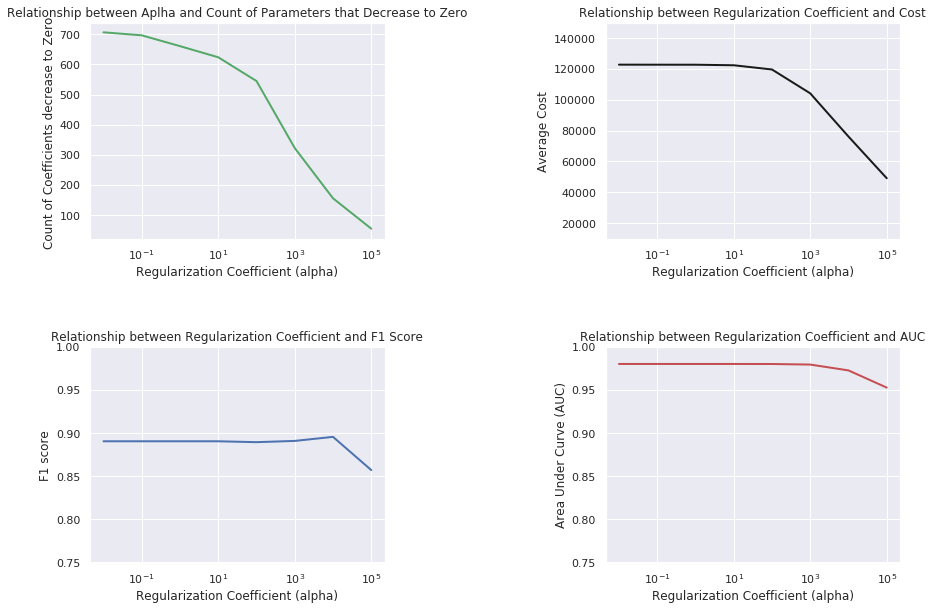

In [367]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

#Regularization Strength
alpha = np.divide(1, C)

sns.set()
#Plot 
plt.figure()
plt.subplot(2,2,1)
plt.xscale('log')
plt.plot(alpha, num_zeros_history, 'g-', linewidth=2, markersize=2)
plt.xlabel('Regularization Coefficient (alpha)')
plt.ylabel('Count of Coefficients decrease to Zero ')
plt.title('Relationship between Aplha and Count of Parameters that Decrease to Zero')

plt.subplot(2,2,2)
plt.xscale('log')
plt.plot(alpha, cost_history, 'k-', linewidth=2, markersize=6)
plt.xlabel('Regularization Coefficient (alpha)')
plt.ylabel('Average Cost')
plt.title('Relationship between Regularization Coefficient and Cost')
plt.ylim([10000, 150000])

plt.subplot(2,2,3)
plt.xscale('log')
plt.plot(alpha, f1_scores, 'b-', linewidth=2, markersize=6)
plt.xlabel('Regularization Coefficient (alpha)')
plt.ylabel('F1 score')
plt.title('Relationship between Regularization Coefficient and F1 Score')
plt.ylim([0.75, 1])

plt.subplot(2,2,4)
plt.xscale('log')
plt.plot(alpha, auc_scores, 'r-', linewidth=2, markersize=6)
plt.xlabel('Regularization Coefficient (alpha)')
plt.ylabel('Area Under Curve (AUC)')
plt.title('Relationship between Regularization Coefficient and AUC')
plt.ylim([0.75, 1])

plt.subplots_adjust(left=None, bottom=None, right=2, top=2, wspace=0.75, hspace=0.5)

It can be observed that as the value of $C$ is decreased (or $C^{-1}$ is increased), the number of zero parameter counts increases. This implies that Lasso Regression is pushing more number coefficients to zero. Depending upon the penalty, a few parameters can be reduced to zero. However, applying higher penalty relatively to parameters can eliminate significant predictors. In such cases, as the regularization cofficient increases up above a certain threshold, the model does not perform well. This variable selection procedure also results in decrease of variance. 

Also, there is a very slight decrease in cost as well. However, there is no change in the AUC and F1 Score. This indicates that this Regularization does not have any significant effect on Precision/Recall/TPR/FPR etc on the traning dataset. 

In [368]:
print(alpha)

[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05]


## 3

### [10 points] Comparing the Bayes' decision rule with logistic regression

The phrase "Bayes' decision rule" is often used to describe a classifier decision rule that minimizes misclassification rate (equally penalizing false positives and false negatives). In this exercise you will first determine the Bayes's decision rule for a binary classification problem where you know the likelihood of date from each class. The binary classification problem has two classes with data distributed as exponential random variables:

$$P(x|C_i) = \lambda_i e^{-\lambda_i x}$$

Where $C_i$ represents the class from which the sample is drawn (0 or 1). We also know that $\lambda_0 = 1$ and $\lambda_1 = 5$.

**(a)** Plot the probability of each class conditional distribution (e.g. likelihood function), $P(x|C_0)$ and $P(x|C_1)$ on the sample plot in the domain $x \in [0,2]$. *You can use [`scipy`'s `expon` module](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html#scipy.stats.expon) for this. Note that the `scale` parameter for this module is defined as $1/\lambda$.*

**(b)** Assuming the prior class distributions are $P(C_0)=P(C_1)=0.5$, determine the Bayes' decision rule using the information above including the posterior distributions and the prior distributions. You will assign the most probable class to the data based on the value of $x$. The decision rule will be of the form: 

If $x > x^*$, then predict Class 0, otherwise predict Class 1

Determine the value $x^*$ that minimizes misclassification (equally penalizing false positives and false negatives, and no penalty/reward for correct detections). Show your work in deriving this value.

**(c)** How does your answer in (b) relate to the the plot you made in (a)? Why?

**(d)** Load the test data in the file `A3_Q3_test.csv`. Apply your decision rule to the data. What is the misclassification rate (error rate, or fraction of misclassified samples) of this decision rule?

**(e)** Load the training data in the file `A3_Q3_train.csv` and train a logistic regression classifier on the data (using default parameters). What is your misclassification error for your test dataset? How does this compare with the Bayes' classifier?

**(f)** What is your decision rule for your logistic regression model? To compute this, extract the parameters from your fit model (look for the `coef_` and `intercept_` attributes) and since the classes are balanced, the decision rule will be to classify a sample $x$ as Class 1 when your logistic regression sigmoid is greater than 0.5 (the halfway point from the two extremes of 0 and 1). How does this compare with the Bayes' classifier?

**(g)** If the prior probabilities were not $P(C_0)=P(C_1)=0.5$, but instead if P(C_1)>P(C_0). How would this impact the optimal decision rule? Would it change, if so, would $x^*$ be larger or smaller?

**(a) Plot the probability of each class conditional distribution (e.g. likelihood function), $P(x|C_0)$ and $P(x|C_1)$ on the sample plot in the domain $x \in [0,2]$.** *You can use [`scipy`'s `expon` module](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html#scipy.stats.expon) for this. Note that the `scale` parameter for this module is defined as $1/\lambda$.*

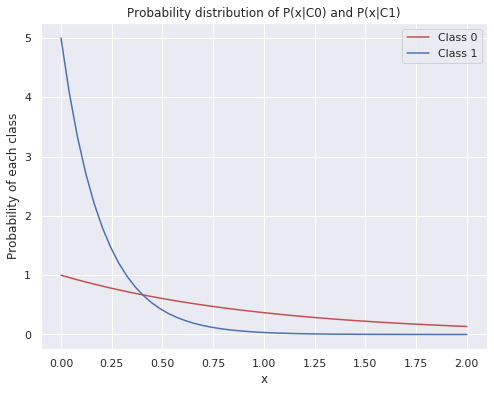

In [370]:
from scipy.stats import expon

sns.set()
plt.figure(figsize=(8,6))
x = np.linspace(0,2)
plt.plot(x, expon.pdf(x,scale=1),'r-', label='Class 0')
plt.plot(x, expon.pdf(x,scale=0.2),'b-', label='Class 1')
plt.xlabel('x')
plt.ylabel('Probability of each class')
plt.title('Probability distribution of P(x|C0) and P(x|C1)')
plt.legend()
plt.show()

**(b) Assuming the prior class distributions are $P(C_0)=P(C_1)=0.5$, determine the Bayes' decision rule using the information above including the posterior distributions and the prior distributions. You will assign the most probable class to the data based on the value of $x$. The decision rule will be of the form:**

**ANSWER**

According to Baye's theorem:

$$P(C_{i}|x) = \frac{P(x|C_{i})P(C_{i})}{P(x)}$$

$$P(C_{0}|x) = \frac{P(x|C_{0})P(C_{0})}{P(x)}
=\frac{1}{1+5e^{-4x}}$$

$$P(C_{1}|x) = \frac{P(x|C_{1})P(C_{1})}{P(x)}
=\frac{5}{5+e^{4x}}$$

As mentioned in the question, 
$$Predicted Class = \begin{cases}
                C_{0}  & x > x^*  \\
                C_{1}  & x <= x^*
            \end{cases}$$
            
Therefore, 

$$ P(C_{0}|x^{*}) >P(C_{1}|x^{*}) \\
\frac{1}{1+5e^{-4x^{*}}} > \frac{5}{5+e^{4x^{*}}} \\
x^{*} > \frac{1}{8}ln(25) \approx 0.40236$$

Therefore the threshold value is set to $x^{*} \approx 0.40236$. This threshold value will minimize misclassification.

**(c) How does your answer in (b) relate to the the plot you made in (a)? Why?**

**ANSWER**

The intersection point in the plot in (a) represents the point $x^*$. The point x belongs to class 1 (red line) when $x <= x^*$ and the point x belongs to Class 0 (blue line) when $x > x^*$. The value of cumulative PDF (area under the curve) is higher for the class 1 when $x <= x^*$. 

**(d) Load the test data in the file `A3_Q3_test.csv`. Apply your decision rule to the data. What is the misclassification rate (error rate, or fraction of misclassified samples) of this decision rule?**

**ANSWER**

For the calculated value of $x^* = 0.40236$, the misclassification rate is `0.23395`.

In [382]:
b_test = pd.read_csv('./data/A3_Q3_test.csv')

X_test = np.array(b_test.x)
y_test = np.array(b_test.y)

b_test['y_pred']=0
b_test['y_pred'][X_test < (np.log(25)/8)]=1
b_test['correct'] = y_test==b_test.y_pred

error_rate = b_test.correct.value_counts()[0]/len(y_test)
print(error_rate)

0.23395


**(e) Load the training data in the file `A3_Q3_train.csv` and train a logistic regression classifier on the data (using default parameters). What is your misclassification error for your test dataset? How does this compare with the Bayes' classifier?**

**ANSWER**

For this dataset, the bayes classifier performs very similar to the logistic regression classifier. Both the models have a very similar misclassification rate of $ \approx 0.234$. This is usually not the case, as logistic regression classifier perform better than bayes classifier. However, for this data set this is not the case. Also, the bayes classifier is the baseline with minimum misclassification rate. 

In [384]:
from sklearn.linear_model import LogisticRegression

train = pd.read_csv('./data/A3_Q3_train.csv')

X_train = np.array(train.x)
y_train = np.array(train.y)

logreg_3 = LogisticRegression()
logreg_3.fit(X_train.reshape(-1, 1), y_train)
y_pred = logreg_3.predict(X_test.reshape(-1, 1))

error_rate = 1 - sum(y_pred==y_test)/len(y_test)
print(error_rate)

0.23399999999999999


**(f) What is your decision rule for your logistic regression model? To compute this, extract the parameters from your fit model (look for the `coef_` and `intercept_` attributes) and since the classes are balanced, the decision rule will be to classify a sample $x$ as Class 1 when your logistic regression sigmoid is greater than 0.5 (the halfway point from the two extremes of 0 and 1). How does this compare with the Bayes' classifier?**

In [386]:
intercept = logreg_3.intercept_
beta_0 = logreg_3.coef_
threshold =  - float(intercept/beta_0)
print(threshold)

0.4033319514305675


$$\frac{p}{1-p}>1 $$ 
For $p > 0.5$, this equation can be reduced to:
$$\frac{e^{\mathbf{w}^{\intercal} \mathbf{x}_i}}{1+ e^{\mathbf{w}^{\intercal} \mathbf{x}_i}} > 0.5 $$

On simplifying and taking log on both sides, it is not difficult to obtain the following expression. 

$$x>-\frac{w_1}{w_0}$$

This represents the threshold value for Logistic Regression model. It can be observed that the threshold value of Logistic regression and Bayes classifier is almost equal at 0.4033. 

**(g) If the prior probabilities were not $P(C_0)=P(C_1)=0.5$, but instead if P(C_1)>P(C_0). How would this impact the optimal decision rule? Would it change, if so, would $x^*$ be larger or smaller?**

**ANSWER**

The value will be larger. The reason for this is that, for the condition $P(C_0)<P(C_1)$, the Class 1 ($C_1$) has higher `prior` probability. Therefore, as per the Bayes rule, given the data, the posterior probability will also increase resulting in increase in the value of $x^*$.

## 4

### [30 points] Supervised learning exploration

For this exercise, you will construct and implement a supervised learning problem solution/experiment. Describe your process and answer these questions clearly and thoroughly. Part of the grade in this assignment is devoted to the quality and professionalism of your work.


*This grade for this question is based on (a) the completeness of the answer in addressing each of the above components, (b) the quality of the work and accuracy of the interpretation of the results of the analysis, (c) the presentation and professionalism of the work, and (d) the amount of creativity demonstrated by the work.*

**(a) Identify a question or problem that's of interest to you and that could be addressed using classification or regression. Explain why it's interesting and what you'd like to accomplish. You're encouraged to be creative.**

**ANSWER**

I'm always curious about health care and want to work in that field after I graduate. Having no professional experience in health care, I take opportunities like these to work on healthcare dataset, which I can showcase to employers which would enhance my understanding of the field as well as be job ready. 

I chose the Breast Cancer Wisconsin Dataset available at the UC Irvine Website. Since, breast cancer symptoms vary from patient-to-patient, it is essential to characterize distinctive features of different patients and design a patient-specific treatment. The detection of the pattern of symptoms is an important technique to correctly understand hidden patterns. The nuclei of the cell tends to change characterstics with presence of cancer cells.  This dataset describe characteristics of the cell nuclei present in the image of potential breast cancer patients. These features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. 

I would like to develop a system/model that can predict, given the nuclei characterstics, if these characterstics are representative of cancerous cells (malignant) or non-cancerous cells (benign).

**(b) Download the data and plot the data to describe it. You can use any dataset of interest to you with the exception of the Iris dataset, the Kaggle Titanic dataset, or the Kaggle chocolate dataset. Possible sources of dataset include (but are not limited to):**

- [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)
- [Kaggle Datasets](https://www.kaggle.com/datasets)
- [Amazon Open Datasets](https://registry.opendata.aws/)
- [Microsoft's Open Data](https://msropendata.com/)
- [Google's Dataset Search](https://datasetsearch.research.google.com/)
- [Awesomedata's list of datasets](https://github.com/awesomedata/awesome-public-datasets)

In [135]:
from sklearn.datasets import load_breast_cancer

b_cancer_dataset = load_breast_cancer() 

bcancer_x= pd.DataFrame(b_cancer_dataset.data)
bcancer_x.columns = b_cancer_dataset.feature_names

bcancer_diagnosis = pd.DataFrame(b_cancer_dataset.target)
bcancer_diagnosis = bcancer_diagnosis.rename(columns={0: "diagnosis"})

bcancer = pd.concat([bcancer_x, bcancer_diagnosis], axis=1)

In [136]:
bcancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


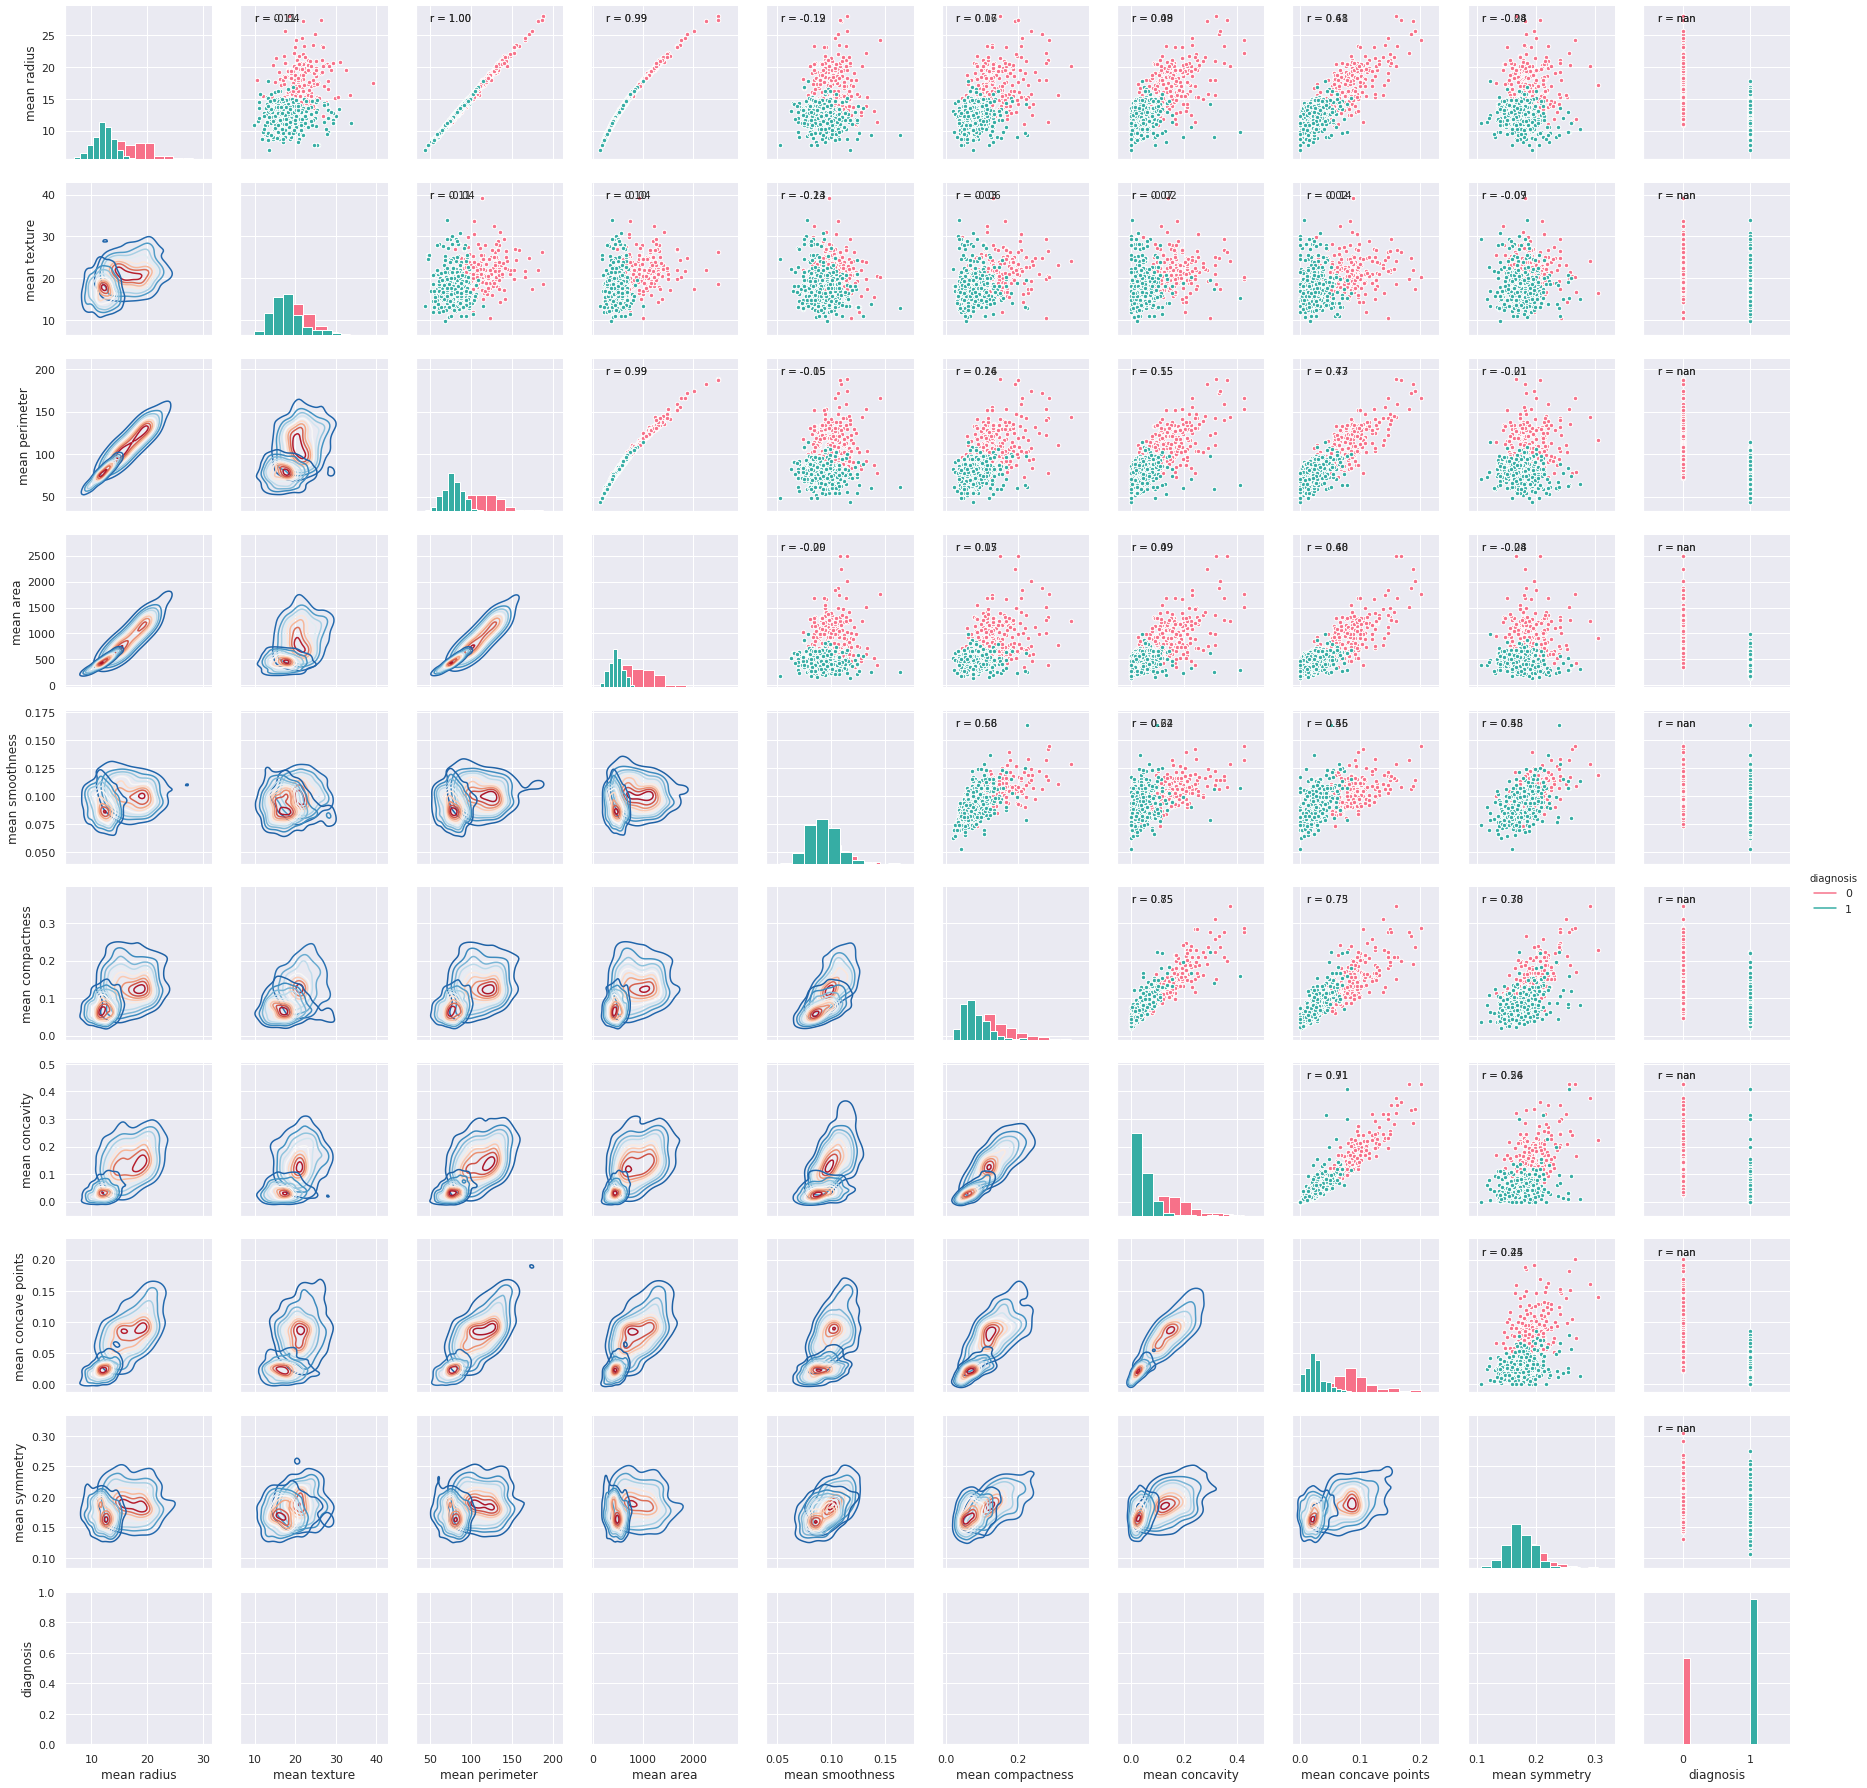

In [166]:
from pandas.plotting import scatter_matrix
from scipy import stats

def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    if r:
        ax.annotate("r = {:.2f}".format(r),xy=(.1, .9), xycoords=ax.transAxes)
        
    
p = sns.PairGrid(bcancer.iloc[:,np.r_[0:9, -1]], hue='diagnosis', palette = 'husl')
p.map_upper(plt.scatter, s = 20, edgecolor = 'w')
p.map_upper(corrfunc)
p.map_diag(plt.hist)
p.map_lower(sns.kdeplot, cmap = 'RdBu_r')
p.add_legend()

p.figsize = (30,30)

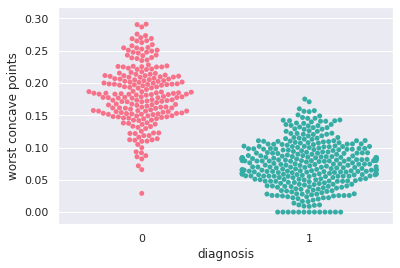

In [160]:
sns.swarmplot(x = 'diagnosis', y = 'worst concave points',palette = 'husl', data = bcancer);

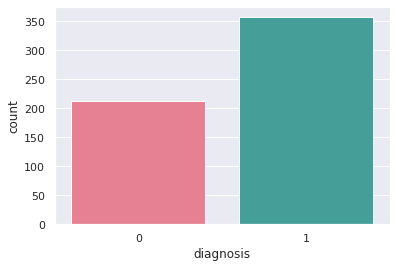

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.countplot(x='diagnosis',data=bcancer, palette = 'husl')
plt.show()

**(c) Formulate your supervised learning question: (a) What is your target variable (what are you trying to predict) and what predictors do you have available? Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)?**

**ANSWER**

The target variable is a binary variable which represents if the nuclei characterstics are benign(0) or maligant (1). There are a total of 30 predictors with 10 nuclie features, namely, radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension. Theses 10 chartacterstics are represented as mean, error and worst, thus making it to 30 features. 

There are no missing values as specified below, so no handling of missing values is required for this problem. For the response variable (diagnosis), the distribution is not evenly spread. The cases with "Malignant" diagnoses is more than "Benign" diagnoses, but the difference is not significantly different. Therefore, no oversampling or undersampling seems to be required. However, the predictors seems to have different magnitude. Therefore, scaling has been performed all the predictors to bring it to similar magnitude. 

In [163]:
#Check for null/missing values
bcancer.isnull().sum()

In [164]:
#Preprocessing function
from sklearn.preprocessing import StandardScaler

def pre_processing(X, y):
    scaler = StandardScaler()
    X_sc = np.array(scaler.fit_transform(X))
    y_sc = np.array(y)
    return X_sc, y_sc

**(d) What supervised learning technique will you use and why?**

**ANSWER**

Supervised Learning Technique Used: Support Vector Machine (SVM)

Reasons for the above technique:

1. SVM can be used for classification
2. SVM may provide better model fit over Logisitic Regression as some of the predictor variables seems to have multicolinearity (as seen in the Pair plot above). 
3. Also, the large predictor value and small sample size, there is a high potential for a non-linear decision boundary. This non-linear decision boundary can be better captured by SVM with the kernel trick. SVM is specially feasible for higher dimensional data as it does not use all the dimensions at once to draw the hyperplane. It chooses the suppor vectors which maximize the distance between support vectors to define this hyperplane.  


**(e) How will you evaluate performance and know whether you succeeded (e.g. ROC curves for binary classification, mean square error or $R^2$ for regression)?**



**ANSWER**

There are several hyperparameters that needs to be considered for SVM. So, the first step would be to find the optimal hyperparameter using Cross Validation. To find the optimal hyperparameters, I will analyse the performance of the model using accuracy and AUC of the ROC. To perform Cross Validation, I've used Grid Search to check for best performance with AUC of ROC as the scoring metric. 

After these hyperparameter selection, I will use these hyperparameters to train the model using entire training dataset and predict for test data. 

I will then assess model accuracy by assessing using accuracy and AUC of the ROC on the test dataset. 

**(f) Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it.** 

**ANSWER**

First the data is split into training and testing with ratio of 70-30%. After this split, an exhaustive search over specified parameter values is performed on the training dataset to find the optimal hyperparameters. Once these hyperparameters are identifeid, the final model is trained on the entire training dataset. The trained model is then used to make predictions for the testing dataset. 

This approach has been adopted because the hyperparameter space is large for SVM. Without optimally selecting these hyperparameters, we might obtain a model which would fit well on traning dataset but will not generalize well. Therefore, cross-validated grid search with AUC of ROC as scoring metric was performed for hyperparameter selection. 

Separate pre-processing was done for tranining and testing of dataset after the split, to prevent data snooping. 

In [204]:
from sklearn.model_selection import train_test_split

X = bcancer.iloc[:,:-1]
y = bcancer.iloc[:,-1]
y = y[:, np.newaxis]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

In [205]:
#Separate Preprocessing for training and testing dataset
X_train_sc, y_train_sc = pre_processing(X_train, y_train)
X_test_sc, y_test_sc = pre_processing(X_test, y_test)

**(g) Run your analysis and show your performance. Include plots of your data and of performance.**

**ANSWER**

In [206]:
#Cross Validation for Hyperparameter Selection for SVM
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV

from scipy import interp
from sklearn.metrics import confusion_matrix

#Hyperparmaeter Grid
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf', 'poly'],
              'degree': [1,2,3,4,5]} 

grid = GridSearchCV(SVC(), param_grid, refit = True, scoring='roc_auc')
grid.fit(X_train_sc, y_train_sc)

print('The optimal Hyperparameters for SVM model are:\n')
print(grid.best_params_) 

The optimal Hyperparameters for SVM model are:

{'C': 1000, 'degree': 1, 'gamma': 0.0001, 'kernel': 'rbf'}


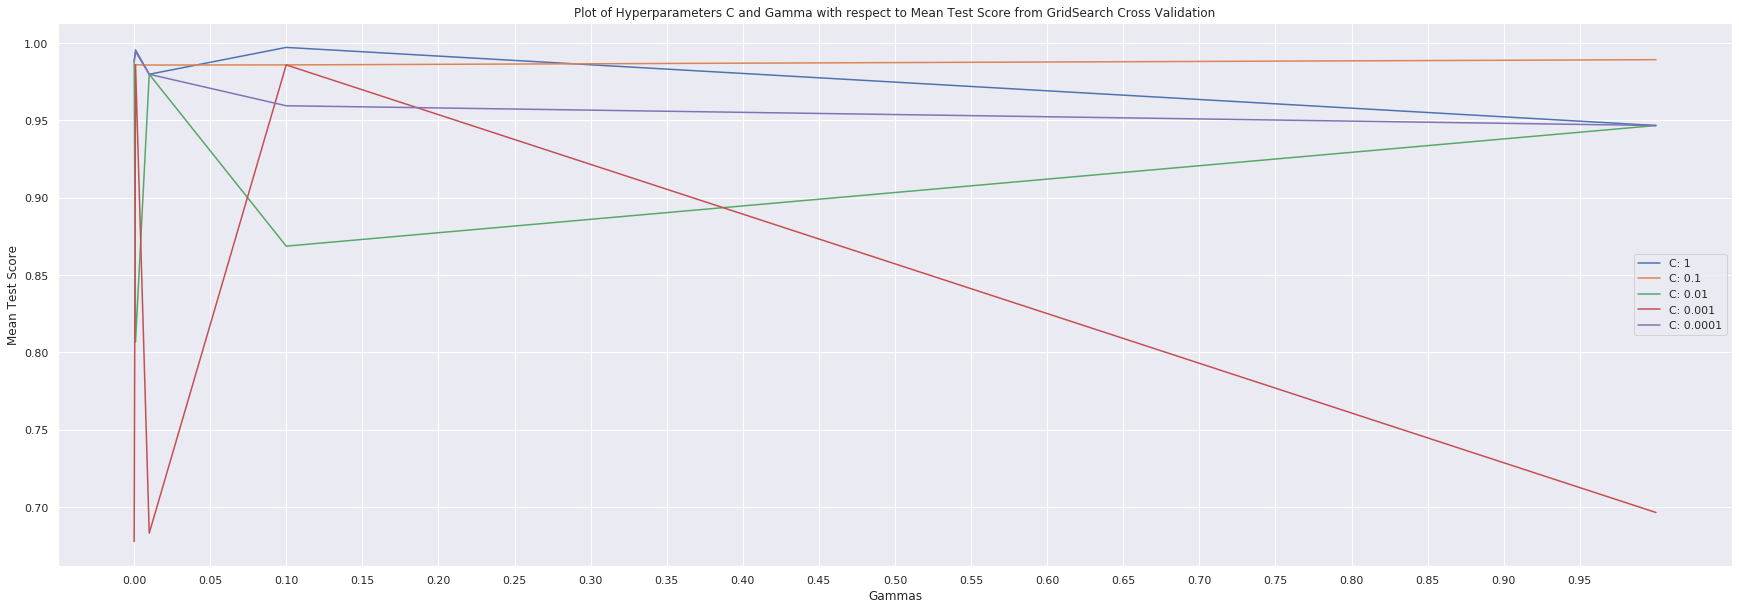

In [299]:
C=param_grid['C']
gammas = param_grid['gamma']
kernels = param_grid['kernel']
degrees = param_grid['degree']

scores = grid.cv_results_['mean_test_score']
scores = np.array(scores).reshape(len(C)*len(kernels)*len(degrees), len(gammas))

fig = plt.figure(figsize=(30, 10))
sns.set()
for ind, i in enumerate(gammas):
    plt.plot(gammas, scores[ind], label='C: ' + str(i))

plt.xticks(np.arange(0, 1, step=0.05))
plt.legend()
plt.xlabel('Gammas')
plt.ylabel('Mean Test Score')
plt.title('Plot of Hyperparameters C and Gamma with respect to Mean Test Score from GridSearch Cross Validation')
plt.show()

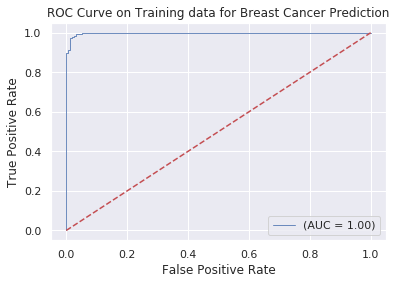

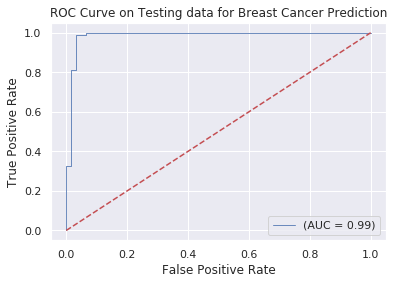

In [390]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

svc = SVC(kernel = 'rbf',degree=1, gamma=0.0001, C=1000, probability = True)
svc.fit(X_train_sc,y_train_sc)

probs = svc.predict_proba(X_train_sc)

fpr, tpr, thresholds = roc_curve(y_train_sc, probs[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, lw=1, alpha=0.8, label='(AUC = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve on Training data for Breast Cancer Prediction')
plt.show()


probs = svc.predict_proba(X_test_sc)

fpr, tpr, thresholds = roc_curve(y_test_sc, probs[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, lw=1, alpha=0.8, label='(AUC = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve on Testing data for Breast Cancer Prediction')
plt.show()

In [220]:
from sklearn.metrics import accuracy_score

preds = svc.predict(X_test_sc)
acc = accuracy_score(y_test_sc, preds)
print('Model Accuracy: ' + str(acc))

Model Accuracy: 0.9824561403508771


In [221]:
confusion_matrix(y_test_sc,preds)

array([[ 59,   2],
       [  1, 109]])

**(h) Describe how your system performed, where your supervised learning algorithm performed well, where it did not, and how you could improve it. Summarize the conclusions from your work (this should involve a degree of interpretation more so than "my classifier achieved an AUC of 0.8").**

**ANSWER**

#### Performance 
As it can be observed in the mean test errors obtained from Grid Search Cross Validation for K=3, that the most optimal hyperparameters for the model were Inverse Regularization term = 1000, gamma value as 0.0001. The AUC obtained from this model is almost close to 0.98. 

Using this parameter, the training dataset was used to retrain the model and it was observed that the AUC obtained from training the model with these hyperparameter on entire training dataset was almost equal to 1. 

The classification performance on the testing data was also measured with ROC and it was found the AUC was 0.98 for testing dataset. Thus, the Models 1 and 2 performed with high true positive rates and simultaneous low false positive rates. There were only 3 misclassification, one for false positive and 2 from false negative. 

Overall, the SVM performed very well for the high dimensional data, it generalized well for the testing dataset. Further improvement can be made by using decision-tree based models and potentially achieve higher accuracy as well. One major limitation of SVM is that although the prediction accuracy is very high, it is little known that which parameters are strong contributor for understanding breast cancer tumor detection. A tree based model like Random Forest can help acheieve similar accuracy and as well provide inference about the contribution of predictor variables in determining the diagnoses for breast cancer. Models like Random Forest also account for parameter selection implicitly, this can be helpful considering the higher dimension of the data. 

#### Summary

Breast cancer (BC) is the most common cancer in women, affecting about 10% of all women at some stages of their life. In recent years, the incidence rate keeps increasing and data show that the survival rate is 88% after five years from diagnosis and 80% after 10 years from diagnosis. Early prediction of breast cancer is one of the most crucial works in the follow-up process. In many hospitals, tissue biopsy is the diagnostic technique. This technique require human intervention and therefore it prone to errors. 
The malignant and benign cells obtained from the fine-needle aspirant (FNA) sample of breast tissue can be classified using the model developed in this problem. This model has high accuracy of identifying malignant and benign cells and very low false positives. This can help the patient with to prevent any form of misdiagnosis or unnecessary diagnosis which could be resulting from the human error prone tissue biopsy technique. With continious development of this model, an inexpensive approach to breast cancer detection can be acheived in a short span of time. 
